In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

In [5]:
x = np.arange(0,10,0.001)
a = 1.5
z = np.sqrt(x/a)

zp = 9.
xp = -4.
rp = 0.1
x1 = np.arange(-10,0,0.001)
p1 = np.sqrt(rp-(x1-xp)**2.) + zp
p2 = zp - np.sqrt(rp-(x1-xp)**2.)

/Users/dana/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
/Users/dana/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


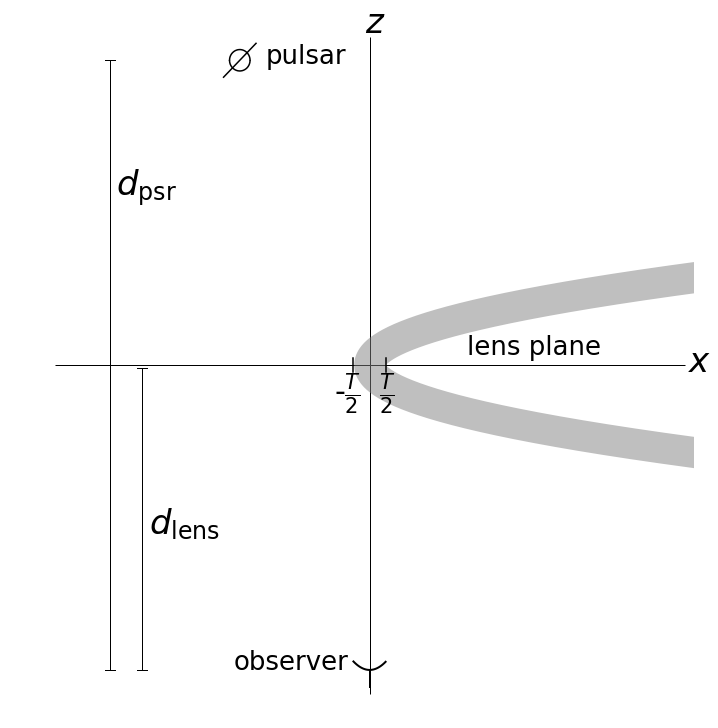

In [6]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

# lens
x3 = np.array([x[::-1],x]).flatten()
z3 = np.array([-1*z[::-1],z]).flatten() 
plt.plot(x3,z3,'k',lw=31,color='gray',alpha=0.5)
plt.plot([-0.5,-0.5],[-0.2,0.2],color='black')
plt.plot([ 0.5, 0.5],[-0.2,0.2],color='black')


# axes
plt.arrow(0,0,0,-9.7,head_width=0., head_length=0., fc='k', ec='k')
plt.arrow(0,0,0, 9.7,head_width=0., head_length=0., fc='k', ec='k')
plt.arrow(0,0,-9.7,0,head_width=0., head_length=0., fc='k', ec='k')
plt.arrow(0,0, 9.7,0,head_width=0., head_length=0., fc='k', ec='k')
ax.annotate(r'$x$',xy=[9.8,-0.2],size=34)
ax.annotate(r'$z$',xy=[-0.15,9.8],size=34)

# pulsar
plt.plot(x1,p1,'k')
plt.plot(x1,p2,'k')
plt.plot([xp-0.5,xp+0.5],[zp-0.5,zp+0.5],'k')

# labels
ax.annotate('lens plane',xy=[3.,0.3],size=26)
ax.annotate('observer',xy=[-4.2,-zp],size=26)
ax.annotate('pulsar', xy=[-3.2,8.9],size=26)

plt.arrow(-8.0,0.,0,9.,head_width=0.3,head_length=0., fc='k',ec='k')
plt.arrow(-8.0,0.,0,-9.,head_width=0.3,head_length=0., fc='k',ec='k')
ax.annotate(r'$d_\mathrm{psr}$',xy=[-7.8,5],size=34)

plt.arrow(-7.0,-5.,0,4.9,head_width=0.3,head_length=0., fc='k',ec='k')
plt.arrow(-7.0,-5.,0,-4.,head_width=0.3,head_length=0., fc='k',ec='k')
ax.annotate(r'$d_\mathrm{lens}$',xy=[-6.8,-5],size=34)

# observer
xo = np.arange(-0.5,0.5,0.01)
zo = (xo)**2. - 9
plt.plot(xo,zo,'k',lw=2)
plt.plot([0,0],[-9,-9.5],'k',lw=2)

ax.annotate(r'-$\frac{T}{2}$',xy=[-1.1,-1.1],size=30)
ax.annotate(r'$\frac{T}{2}$',xy=[ 0.3,-1.1],size=30)
#

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.axis('off')

plt.tight_layout()
plt.savefig('../geometry_lens.pdf')


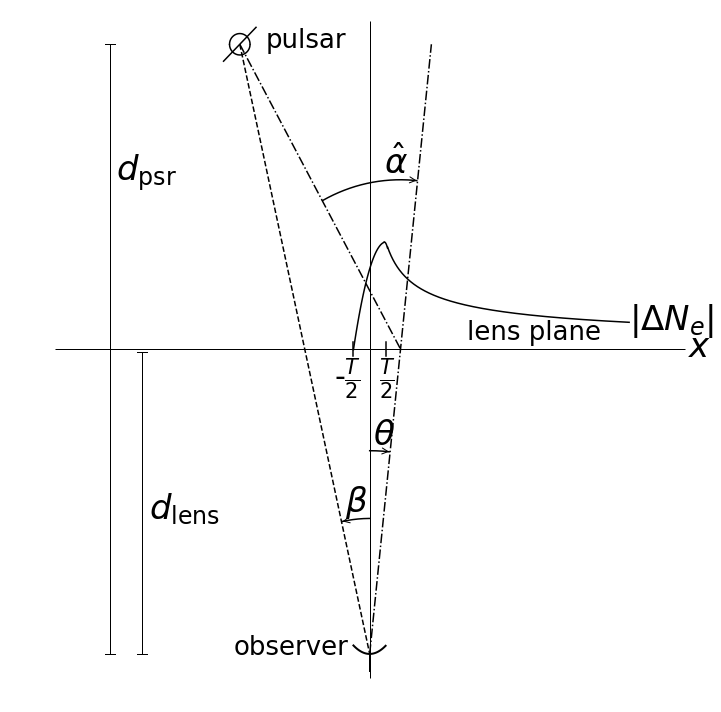

In [7]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

# axes
plt.arrow(0,0,0,-9.7,head_width=0., head_length=0., fc='k', ec='k')
plt.arrow(0,0,0, 9.7,head_width=0., head_length=0., fc='k', ec='k')
plt.arrow(0,0,-9.7,0,head_width=0., head_length=0., fc='k', ec='k')
plt.arrow(0,0, 9.7,0,head_width=0., head_length=0., fc='k', ec='k')
ax.annotate(r'$x$',xy=[9.8,-0.2],size=34)
ax.annotate(r'$|\Delta N_e|$',xy=[8.,0.6],size=34)

# labels
ax.annotate('lens plane',xy=[3.,0.3],size=26)
ax.annotate('observer',xy=[-4.2,-zp],size=26)
ax.annotate('pulsar', xy=[-3.2,8.9],size=26)

# pulsar
plt.plot(x1,p1,'k')
plt.plot(x1,p2,'k')
plt.plot([xp-0.5,xp+0.5],[zp-0.5,zp+0.5],'k')

# observer
xo = np.arange(-0.5,0.5,0.01)
zo = (xo)**2. - 9
plt.plot(xo,zo,'k',lw=2)
plt.plot([0,0],[-9,-9.5],'k',lw=2)

# Column density
# x > T/2
xc = np.arange(0.55,8,0.01)
tc = 0.005
rc = 100000.
zc = 2.*tc*np.sqrt(1+rc/(2*xc))
plt.plot(xc,zc,'k')
# x < T/2
xc2 = np.arange(-0.5,0.45,0.01)
ac2 = 3.18
zc2 = -ac2*(xc2-0.5)**2 + 2.*tc*np.sqrt(1+rc/(2*0.5))
plt.plot(xc2,zc2,'k')
# Smoothing region
xc3 = np.arange(0.45,0.55,0.01)
ac3 = 18.
zc3 = -ac3*(xc3-0.45)**2 + 2.*tc*np.sqrt(1+rc/(2*0.5))
plt.plot(xc3,zc3,'k')

# Angles
plt.plot([xp,0],[zp,-9],'k--')
plt.plot([xp,xc[40]],[zp,0],'k-.')
plt.plot([0.,(zp+9.)/(0+9.)*xc[40]],[-9,zp],'k-.')

def arc(x0,z0,r=1,a0=0,a1=np.pi/2,pos_dir = True):
    x = np.arange(x0+r*np.sin(a0),x0+r*np.sin(a1),0.001)
    z = np.sqrt(r**2.-(x-x0)**2.)+z0
    line = plt.plot(x,z,'k')[0]
    if pos_dir:
        add_arrow(line,position=x[-2])
    else:
        add_arrow(line,position=x[1],direction='left')
    return x, z

arc(0.,-9,r=4,a0=-0.21,a1=0.,pos_dir=False)
arc(0.,-9,r=6,a0=0.,a1=0.10)
arc(xc[40],0,r=5,a0=-0.5,a1=0.1)

plt.arrow(-8.0,0.,0,9.,head_width=0.3,head_length=0., fc='k',ec='k')
plt.arrow(-8.0,0.,0,-9.,head_width=0.3,head_length=0., fc='k',ec='k')
ax.annotate(r'$d_\mathrm{psr}$',xy=[-7.8,5],size=34)

plt.arrow(-7.0,-5.,0,4.9,head_width=0.3,head_length=0., fc='k',ec='k')
plt.arrow(-7.0,-5.,0,-4.,head_width=0.3,head_length=0., fc='k',ec='k')
ax.annotate(r'$d_\mathrm{lens}$',xy=[-6.8,-5],size=34)

plt.plot([-0.5,-0.5],[-0.2,0.2],color='black')
plt.plot([ 0.5, 0.5],[-0.2,0.2],color='black')
ax.annotate(r'-$\frac{T}{2}$',xy=[-1.1,-1.1],size=30)
ax.annotate(r'$\frac{T}{2}$',xy=[ 0.3,-1.1],size=30)

ax.annotate(r'$\hat{\alpha}$',xy=[0.45,5.2],size=34)
ax.annotate(r'$\beta$',xy=[-0.76,-4.8],size=34)
ax.annotate(r'$\theta$',xy=[0.11,-2.8],size=34)

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.axis('off')

plt.tight_layout()
#plt.savefig('../geometry_density.jpg')

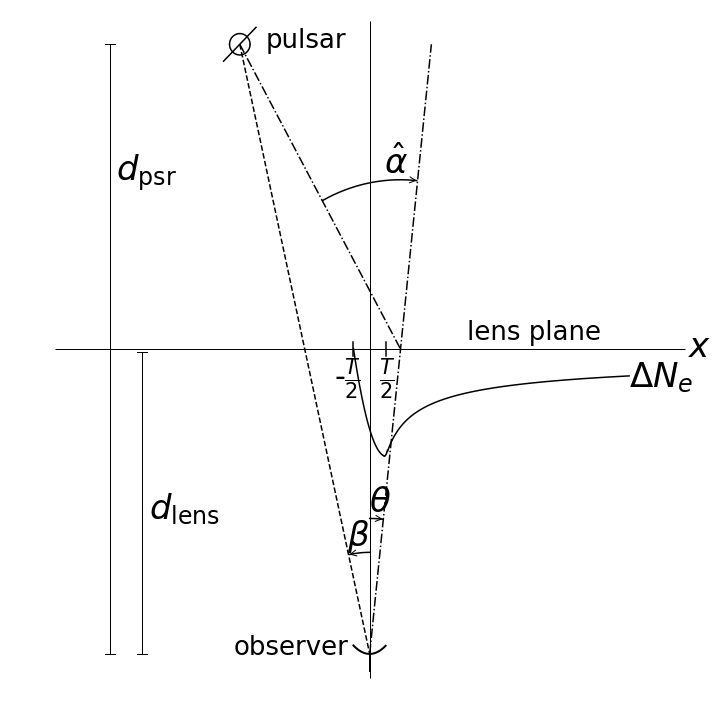

In [8]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

# axes
plt.arrow(0,0,0,-9.7,head_width=0., head_length=0., fc='k', ec='k')
plt.arrow(0,0,0, 9.7,head_width=0., head_length=0., fc='k', ec='k')
plt.arrow(0,0,-9.7,0,head_width=0., head_length=0., fc='k', ec='k')
plt.arrow(0,0, 9.7,0,head_width=0., head_length=0., fc='k', ec='k')
ax.annotate(r'$x$',xy=[9.8,-0.2],size=34)
ax.annotate(r'$\Delta N_e$',xy=[8.,-1.1],size=34)

# labels
ax.annotate('lens plane',xy=[3.,0.3],size=26)
ax.annotate('observer',xy=[-4.2,-zp],size=26)
ax.annotate('pulsar', xy=[-3.2,8.9],size=26)

# pulsar
plt.plot(x1,p1,'k')
plt.plot(x1,p2,'k')
plt.plot([xp-0.5,xp+0.5],[zp-0.5,zp+0.5],'k')

# observer
xo = np.arange(-0.5,0.5,0.01)
zo = (xo)**2. - 9
plt.plot(xo,zo,'k',lw=2)
plt.plot([0,0],[-9,-9.5],'k',lw=2)

# Column density
# x > T/2
xc = np.arange(0.55,8,0.01)
tc = 0.005
rc = 100000.
zc = -2.*tc*np.sqrt(1+rc/(2*xc))
plt.plot(xc,zc,'k')
# x < T/2
xc2 = np.arange(-0.5,0.45,0.01)
ac2 = 3.18
zc2 = -1*(-ac2*(xc2-0.5)**2 + 2.*tc*np.sqrt(1+rc/(2*0.5)))
plt.plot(xc2,zc2,'k')
# Smoothing region
xc3 = np.arange(0.45,0.55,0.01)
ac3 = 18.
zc3 = -1*(-ac3*(xc3-0.45)**2 + 2.*tc*np.sqrt(1+rc/(2*0.5)))
plt.plot(xc3,zc3,'k')

# Angles
plt.plot([xp,0],[zp,-9],'k--')
plt.plot([xp,xc[40]],[zp,0],'k-.')
plt.plot([0.,(zp+9.)/(0+9.)*xc[40]],[-9,zp],'k-.')

def arc(x0,z0,r=1,a0=0,a1=np.pi/2,pos_dir = True):
    x = np.arange(x0+r*np.sin(a0),x0+r*np.sin(a1),0.001)
    z = np.sqrt(r**2.-(x-x0)**2.)+z0
    line = plt.plot(x,z,'k')[0]
    if pos_dir:
        add_arrow(line,position=x[-2])
    else:
        add_arrow(line,position=x[1],direction='left')
    return x, z

arc(0.,-9,r=3,a0=-0.21,a1=0.,pos_dir=False)
arc(0.,-9,r=4,a0=0.,a1=0.10)
arc(xc[40],0,r=5,a0=-0.5,a1=0.1)

plt.arrow(-8.0,0.,0,9.,head_width=0.3,head_length=0., fc='k',ec='k')
plt.arrow(-8.0,0.,0,-9.,head_width=0.3,head_length=0., fc='k',ec='k')
ax.annotate(r'$d_\mathrm{psr}$',xy=[-7.8,5],size=34)

plt.arrow(-7.0,-5.,0,4.9,head_width=0.3,head_length=0., fc='k',ec='k')
plt.arrow(-7.0,-5.,0,-4.,head_width=0.3,head_length=0., fc='k',ec='k')
ax.annotate(r'$d_\mathrm{lens}$',xy=[-6.8,-5],size=34)

plt.plot([-0.5,-0.5],[-0.2,0.2],color='black')
plt.plot([ 0.5, 0.5],[-0.2,0.2],color='black')
ax.annotate(r'-$\frac{T}{2}$',xy=[-1.1,-1.1],size=30)
ax.annotate(r'$\frac{T}{2}$',xy=[ 0.3,-1.1],size=30)

ax.annotate(r'$\hat{\alpha}$',xy=[0.45,5.2],size=34)
ax.annotate(r'$\beta$',xy=[-0.7,-5.8],size=34)
ax.annotate(r'$\theta$',xy=[-0.02,-4.8],size=34)

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.axis('off')

plt.tight_layout()
plt.savefig('../geometry_density.pdf')

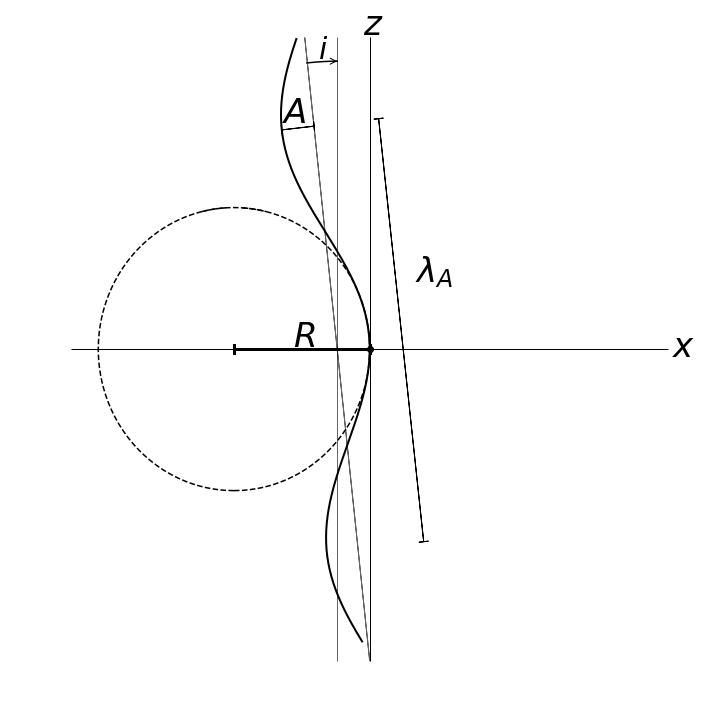

In [12]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

# axes
plt.arrow(0,0,0,-9.2,head_width=0., head_length=0., fc='k', ec='k')
plt.arrow(0,0,0, 9.2,head_width=0., head_length=0., fc='k', ec='k')
plt.arrow(0,0,-9.2,0,head_width=0., head_length=0., fc='k', ec='k')
plt.arrow(0,0, 9.2,0,head_width=0., head_length=0., fc='k', ec='k')
ax.annotate(r'$x$',xy=[9.3,-0.2],size=34)
ax.annotate(r'$z$',xy=[-0.2,9.3],size=34)


la = 2.*np.pi*2.
A = 1.

# axes
plt.arrow(-A,0,1,-9.2,head_width=0., head_length=0., fc='k', ec='k',alpha=0.6)
plt.arrow(-A,0,-1,9.2,head_width=0., head_length=0., fc='k', ec='k',alpha=0.6)
plt.arrow(-A,0,0,-9.2,head_width=0., head_length=0., fc='k', ec='k',alpha=0.6)
plt.arrow(-A,0,0,9.2,head_width=0., head_length=0., fc='k', ec='k',alpha=0.6)
#plt.arrow(0,0,-9.2,-1,head_width=0., head_length=0., fc='k', ec='k',alpha=0.6)
#plt.arrow(0,0, 9.2,1,head_width=0., head_length=0., fc='k', ec='k',alpha=0.6)
#ax.annotate(r'$x^\prime$',xy=[9.3,0.8],size=34,alpha=0.6)
#ax.annotate(r'$z^\prime$',xy=[-1.2,9.3],size=34,alpha=0.6)

inc = np.arctan(1./9.)
def rotate(xp,zp,inc=inc):
    return xp*np.cos(inc)-zp*np.sin(inc),xp*np.sin(inc)+zp*np.cos(inc)


zp0 = la/(2.*np.pi)*np.arcsin(-la/(A*2.*np.pi)*np.tan(inc))
xp0 = A*np.cos(2.*np.pi/la*zp0)
x0,z0 = rotate(xp0,zp0)

zp = np.arange(-9,9,0.1)
xp = A*np.cos(2.*np.pi/la*zp)
x,z = rotate(xp,zp)
plt.plot(x-x0,z-z0,'k',lw=2)

plt.plot(x0-x0,z0-z0,'ko')

arc(-A,0.,r=8.5,a0=-0.11,a1=0.)
ax.annotate(r'$i$',xy=[-0.6-A,8.6],size=30)

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.axis('off')

zp1 = -la/2.
zp2 = 0.
zp3 = la/2.
xp1 = 2.
xp2 = 2.
xp3 = 2.
x1,z1 = rotate(xp1,zp1)
x2,z2 = rotate(xp2,zp2)
x3,z3 = rotate(xp3,zp3)
plt.arrow(x2-x0,z2-z0,x1-x2,z1-z2,head_width=0.3, head_length=0., fc='k', ec='k')
plt.arrow(x2-x0,z2-z0,x3-x2,z3-z2,head_width=0.3, head_length=0., fc='k', ec='k')

zp1 = la/2.
zp2 = la/2.
zp3 = la/2.
xp1 = -1.
xp2 = -0.5
xp3 = 0.
x1,z1 = rotate(xp1,zp1)
x2,z2 = rotate(xp2,zp2)
x3,z3 = rotate(xp3,zp3)
plt.arrow(x2-x0,z2-z0,x1-x2,z1-z2,head_width=0.3, head_length=0., fc='k', ec='k')
plt.arrow(x2-x0,z2-z0,x3-x2,z3-z2,head_width=0.3, head_length=0., fc='k', ec='k')

r = la**2./(4.*np.pi**2.*A*np.cos(inc)**3.*np.sqrt(1.-la**2./(4.*np.pi**2.*A**2.)*np.tan(inc)**2.))
xr0 = x0 - r
z = np.arange(z0-r,z0+r,0.01)
x1 = np.sqrt(r**2.-(z-z0)**2.)+xr0
x2 = xr0 - np.sqrt(r**2.-(z-z0)**2.)
plt.plot(x1-x0,z-z0,'k--')
plt.plot(x2-x0,z-z0,'k--')
x = np.arange(xr0-1.,xr0+1.,0.01)
z = np.sqrt(r**2.-(x-xr0)**2.)+z0
plt.plot(x-x0,z-z0,'k--')
plt.arrow(-r/2,0,-r/2,0,head_width=0.3, head_length=0., fc='k', ec='k',lw=3)
plt.arrow(-r/2,0,r/2,0,head_width=0.3, head_length=0., fc='k', ec='k',lw=3)

ax.annotate(r'$A$',xy=[-2.7,6.7],size=34)
ax.annotate(r'$\lambda_A$',xy=[1.4,2],size=34)
ax.annotate(r'$R$',xy=[-2.35,0.1],size=34)


plt.tight_layout()
plt.savefig('../radius_of_curvature.pdf')

In [15]:
x0,z0

(1.0185265928834866, -0.3377746580318548)

In [31]:
r/2

2.0893942383532496